In [51]:
import os
import numpy as np
import pandas as pd

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [54]:
from path import *
from utils import *

In [55]:
df_feat = pd.read_excel(feat_file)

In [56]:
df_feat

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean
0,10231,C083,10231,5,F,120,4,IDS,on,0.080625,267.005728,271.358561,269.635229,435.859100,905.886108,2016.684448,3215.907227
1,10232,C083,10232,5,F,120,4,IDS,a,0.118875,334.141502,418.112246,365.762249,733.240478,1998.356201,3124.705811,4457.481934
2,10233,C083,10233,5,F,120,4,IDS,on,0.370000,244.816960,272.745799,257.093232,581.523438,1800.463257,2705.837402,3537.889160
3,10234,C083,10234,5,F,120,4,IDS,au,0.130000,385.692754,399.961437,389.193664,522.594971,1729.905396,3019.603271,4110.695801
4,10235,C083,10235,5,F,120,4,IDS,in,0.103000,373.290302,399.362999,389.671290,591.096924,1545.306152,2429.643066,3449.245850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,9984,C080,9984,5,M,372,12,ADS,i,0.104688,157.204578,166.187323,161.020240,356.901184,2327.087402,3311.602539,4494.021973
10763,9985,C080,9985,5,M,372,12,ADS,an,0.068062,138.330594,143.016893,140.427588,501.899078,895.333252,2358.484863,3444.589844
10764,9986,C080,9986,5,M,372,12,ADS,ai,0.059500,156.527893,187.245213,170.191568,406.867371,1764.433594,2785.945313,3826.652588
10765,9987,C080,9987,5,M,372,12,ADS,a,0.081000,141.154354,148.879554,143.262969,719.794800,1481.318237,2832.031738,3997.157959


In [25]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_feat loaded with the 'meanF0Hz' column
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column_name], bins=30, color='blue', alpha=0.7)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

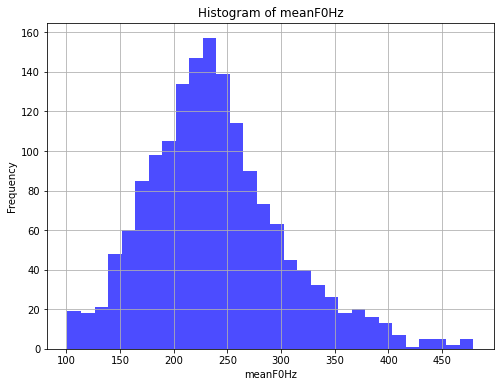

In [26]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'ADS'], 'meanF0Hz')

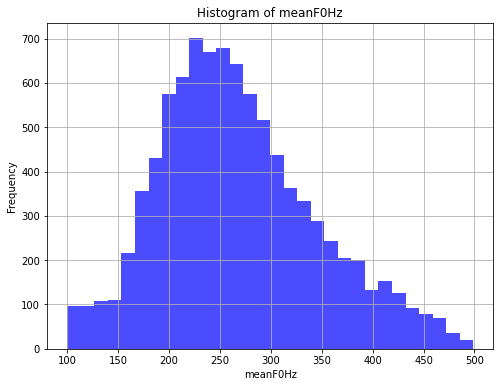

In [27]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'IDS'], 'meanF0Hz')

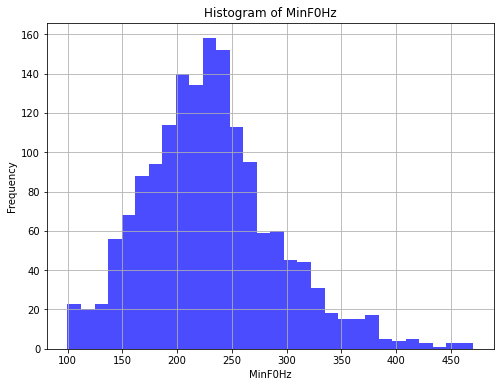

In [28]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'ADS'], 'MinF0Hz')

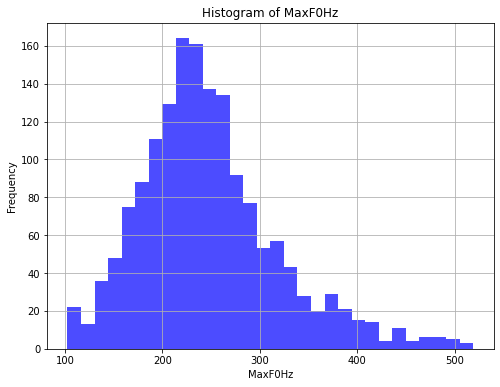

In [29]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'ADS'], 'MaxF0Hz')

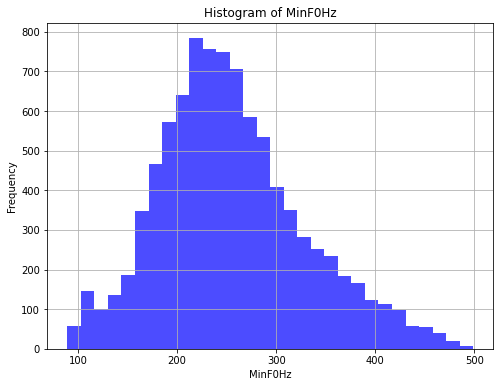

In [30]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'IDS'], 'MinF0Hz')

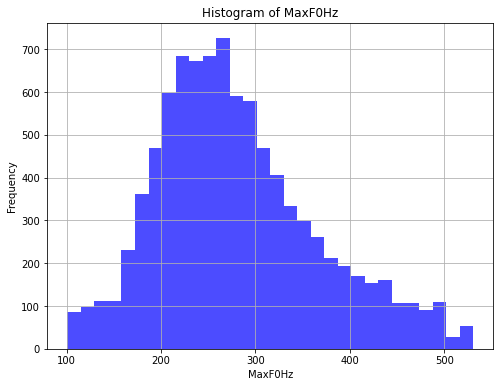

In [32]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'IDS'], 'MaxF0Hz')

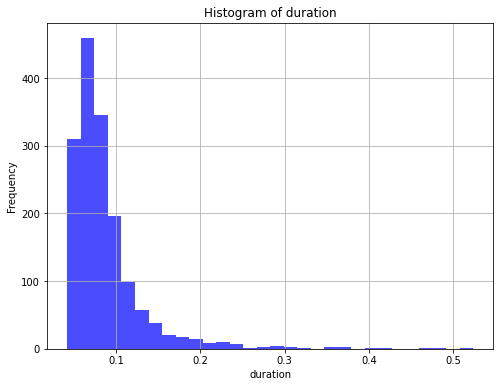

In [33]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'ADS'], 'duration')

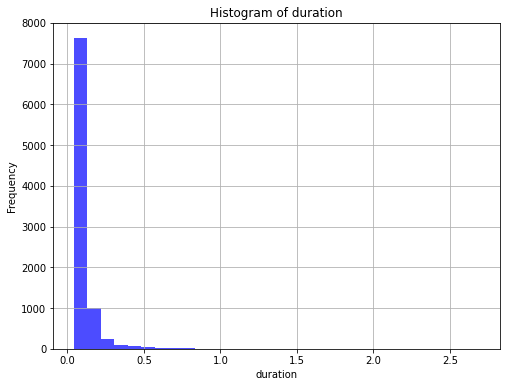

In [34]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'IDS'], 'duration')

In [37]:
np.max(df_feat['duration']), np.min(df_feat['duration'])

(2.6936875, 0.04025)

In [41]:
df_feat_IDS = df_feat[df_feat['SpeechType'] == 'IDS'].copy()

In [42]:
df_feat_IDS['duration_cent'] =  (df_feat_IDS['duration'] - df_feat_IDS['duration'].mean()) / df_feat_IDS['duration'].std()

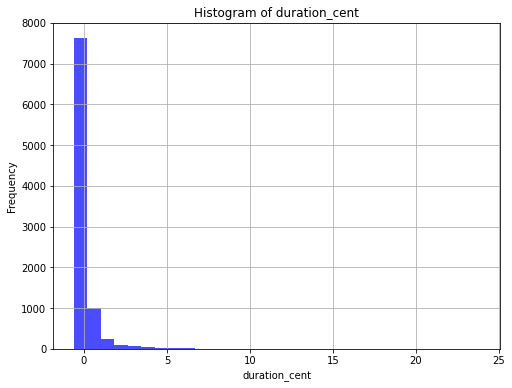

In [43]:
plot_histogram(df_feat_IDS, 'duration_cent')

In [44]:
df_feat = df_feat[df_feat['duration'] <= 0.6].reset_index(drop=True)

In [45]:
df_feat

,Unnamed: 0.1,SPK_id,Unnamed: 0,SES,SEX,AgeInDays,age_in_mois,SpeechType,vowels,duration,MinF0Hz,MaxF0Hz,meanF0Hz,f1_mean,f2_mean,f3_mean,f4_mean,duration_cent
0,10231,C083,10231,5,F,120,4,IDS,on,0.080625,267.005728,271.358561,269.635229,435.859100,905.886108,2016.684448,3215.907227,-0.235717
1,10232,C083,10232,5,F,120,4,IDS,a,0.118875,334.141502,418.112246,365.762249,733.240478,1998.356201,3124.705811,4457.481934,0.139327
2,10233,C083,10233,5,F,120,4,IDS,on,0.370000,244.816960,272.745799,257.093232,581.523438,1800.463257,2705.837402,3537.889160,2.601626
3,10234,C083,10234,5,F,120,4,IDS,au,0.130000,385.692754,399.961437,389.193664,522.594971,1729.905396,3019.603271,4110.695801,0.248408
4,10235,C083,10235,5,F,120,4,IDS,in,0.103000,373.290302,399.362999,389.671290,591.096924,1545.306152,2429.643066,3449.245850,-0.016329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,9984,C080,9984,5,M,372,12,ADS,i,0.104688,157.204578,166.187323,161.020240,356.901184,2327.087402,3311.602539,4494.021973,0.000217
10667,9985,C080,9985,5,M,372,12,ADS,an,0.068062,138.330594,143.016893,140.427588,501.899078,895.333252,2358.484863,3444.589844,-0.358894
10668,9986,C080,9986,5,M,372,12,ADS,ai,0.059500,156.527893,187.245213,170.191568,406.867371,1764.433594,2785.945313,3826.652588,-0.442849
10669,9987,C080,9987,5,M,372,12,ADS,a,0.081000,141.154354,148.879554,143.262969,719.794800,1481.318237,2832.031738,3997.157959,-0.232040


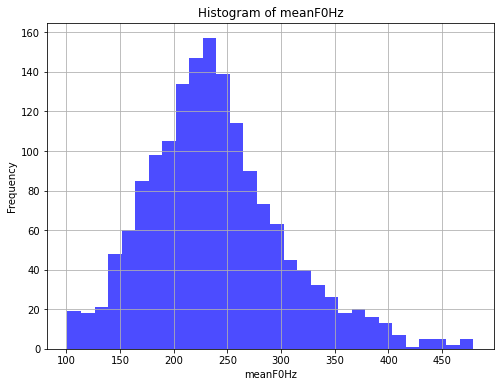

In [46]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'ADS'], 'meanF0Hz')

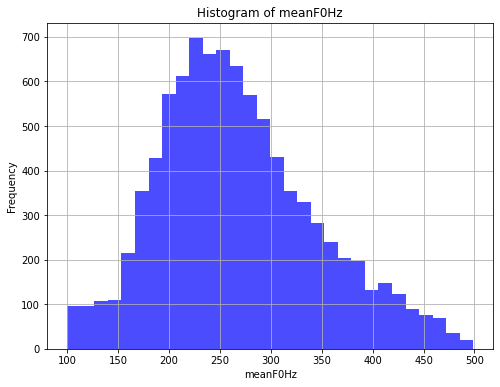

In [47]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'IDS'], 'meanF0Hz')

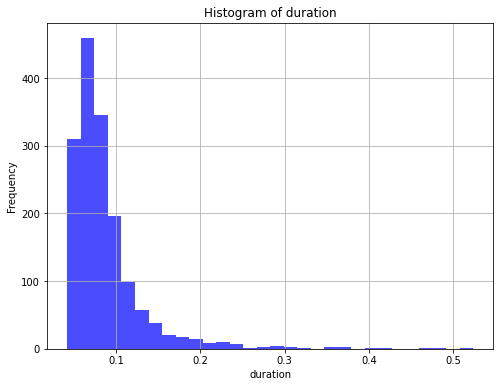

In [49]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'ADS'], 'duration')

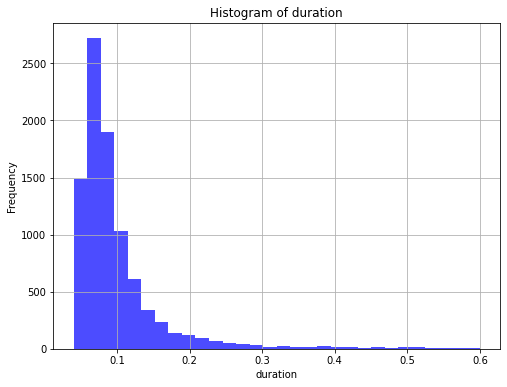

In [50]:
plot_histogram(df_feat[df_feat['SpeechType'] == 'IDS'], 'duration')

In [16]:
df_feat['SPK_id'].unique()

array(['C083', 'C067', 'C071', 'C069', 'C052', 'C031', 'C028', 'C035',
       'C054', 'C065', 'C062', 'C077', 'C045', 'C044', 'C068', 'C012',
       'C037', 'C09', 'C072', 'C053', 'C056', 'C078', 'C023', 'C057',
       'C080', 'C061', 'C010'], dtype=object)

In [23]:
df_feat['SPK_id'].nunique()

27

In [17]:
df_feat[df_feat['SpeechType'] == 'ADS']['SPK_id'].unique()

array(['C083', 'C069', 'C052', 'C028', 'C035', 'C065', 'C077', 'C044',
       'C068', 'C062', 'C054', 'C071', 'C09', 'C067', 'C031', 'C045',
       'C072', 'C056', 'C078', 'C080', 'C023', 'C057', 'C053', 'C061'],
      dtype=object)

In [24]:
df_feat[df_feat['SpeechType'] == 'ADS']['SPK_id'].nunique()

24

In [18]:
df_feat[df_feat['SpeechType'] == 'IDS']['SPK_id'].unique()

array(['C083', 'C067', 'C071', 'C069', 'C052', 'C031', 'C028', 'C035',
       'C054', 'C065', 'C062', 'C077', 'C045', 'C044', 'C068', 'C012',
       'C037', 'C09', 'C072', 'C053', 'C056', 'C078', 'C023', 'C057',
       'C080', 'C061', 'C010'], dtype=object)

In [25]:
df_feat[df_feat['SpeechType'] == 'IDS']['SPK_id'].nunique()

27

In [19]:
df_feat[df_feat['SpeechType'] == 'ADS']['SPK_id'].count()

1606

In [20]:
df_feat[df_feat['SpeechType'] == 'IDS']['SPK_id'].count()

9161

In [22]:
df_feat[df_feat['SpeechType'] == 'ADS'].groupby('SPK_id').size()

SPK_id
C023     25
C028     60
C031    115
C035    113
C044    105
C045      4
C052     20
C053    109
C054     88
C056     30
C057    130
C061      1
C062     14
C065     41
C067     61
C068     22
C069     97
C071     45
C072     84
C077     41
C078     18
C080    143
C083    153
C09      87
dtype: int64

In [26]:
df_feat[df_feat['SpeechType'] == 'IDS'].groupby('SPK_id').size()

SPK_id
C010    213
C012    382
C023    147
C028    411
C031    380
C035    673
C037     94
C044    214
C045    377
C052     45
C053    689
C054    378
C056    556
C057    437
C061    333
C062    189
C065    671
C067    487
C068     57
C069    768
C071    333
C072    307
C077    219
C078     84
C080    179
C083    365
C09     173
dtype: int64

In [29]:
df_feat['vowels'].unique()

array(['on', 'a', 'au', 'in', 'eu', 'e', 'an', 'i', 'ou', 'o', 'oe', 'ai',
       'u', 'en'], dtype=object)

In [34]:
df_feat['vowels'].nunique()

14

In [28]:
df_feat[df_feat['SpeechType'] == 'ADS'].groupby(['SPK_id', 'vowels']).size()

SPK_id  vowels
C023    a         4
        ai        3
        au        2
        e         2
        i         3
                 ..
C09     o         3
        oe        8
        on        4
        ou        3
        u         1
Length: 250, dtype: int64

In [30]:
df_feat[df_feat['SpeechType'] == 'IDS'].groupby(['SPK_id', 'vowels']).size()

SPK_id  vowels
C010    a         60
        ai        29
        an        11
        au         8
        e         23
                  ..
C09     o          6
        oe        10
        on        11
        ou        10
        u          6
Length: 344, dtype: int64

In [32]:
df_feat[df_feat['SpeechType'] == 'ADS'].groupby('SPK_id')['vowels'].nunique()

SPK_id
C023     9
C028    13
C031    13
C035    12
C044    13
C045     3
C052     8
C053    13
C054    12
C056    12
C057    13
C061     1
C062     7
C065    13
C067    13
C068     7
C069    12
C071    10
C072    13
C077    12
C078     4
C080    13
C083    13
C09     11
Name: vowels, dtype: int64

In [33]:
df_feat[df_feat['SpeechType'] == 'IDS'].groupby('SPK_id')['vowels'].nunique()

SPK_id
C010    12
C012    13
C023    12
C028    13
C031    13
C035    13
C037    11
C044    13
C045    13
C052     9
C053    14
C054    13
C056    13
C057    13
C061    13
C062    13
C065    13
C067    13
C068    13
C069    13
C071    13
C072    13
C077    13
C078    13
C080    13
C083    13
C09     13
Name: vowels, dtype: int64

In [35]:
target_vowel_catg = ['a', 'ai', 'au', 'e', 'eu', 'i', 'o', 'oe', 'ou', 'u']

In [43]:
df_feat[(df_feat['SpeechType'] == 'ADS') & (df_feat['vowels'].isin(target_vowel_catg))].groupby('SPK_id')['vowels'].nunique()

SPK_id
C023     7
C028    10
C031    10
C035     9
C044    10
C045     3
C052     7
C053    10
C054     9
C056     9
C057    10
C061     1
C062     5
C065    10
C067    10
C068     5
C069     9
C071     8
C072    10
C077     9
C078     4
C080    10
C083    10
C09      9
Name: vowels, dtype: int64

In [44]:
df_feat[(df_feat['SpeechType'] == 'IDS') & (df_feat['vowels'].isin(target_vowel_catg))].groupby('SPK_id')['vowels'].nunique()

SPK_id
C010     9
C012    10
C023     9
C028    10
C031    10
C035    10
C037     8
C044    10
C045    10
C052     7
C053    10
C054    10
C056    10
C057    10
C061    10
C062    10
C065    10
C067    10
C068    10
C069    10
C071    10
C072    10
C077    10
C078    10
C080    10
C083    10
C09     10
Name: vowels, dtype: int64

In [46]:
df_feat.isna().sum()

Unnamed: 0.1    0
SPK_id          0
Unnamed: 0      0
SES             0
SEX             0
AgeInDays       0
age_in_mois     0
SpeechType      0
vowels          0
duration        0
MinF0Hz         0
MaxF0Hz         0
meanF0Hz        0
f1_mean         0
f2_mean         0
f3_mean         0
f4_mean         0
dtype: int64

In [50]:
df_feat.groupby('SPK_id')['age_in_mois'].nunique()

SPK_id
C010    1
C012    1
C023    2
C028    2
C031    2
C035    3
C037    1
C044    2
C045    2
C052    1
C053    3
C054    3
C056    2
C057    3
C061    2
C062    2
C065    3
C067    3
C068    1
C069    3
C071    2
C072    2
C077    2
C078    1
C080    2
C083    3
C09     2
Name: age_in_mois, dtype: int64

In [52]:
df_feat['AgeInDays'].unique()

array([120, 122, 123, 130, 131, 135, 140, 143, 144, 146, 149, 150, 156,
       242, 248, 250, 256, 257, 261, 265, 267, 277, 280, 282, 284, 287,
       299, 302, 368, 372, 373, 374, 390, 397, 430, 480, 132, 134, 145,
       251, 258, 262, 270, 396, 475, 481], dtype=int64)